## Amazon Sales Report

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Load the data (ensure to use the correct path to your file)
data = pd.read_csv(r'C:\Users\sap\OneDrive\Desktop\Amazon\amazon_sales.csv')

# DATA ClEANING

In [3]:
# Check the first few rows of the data to confirm it's loaded correctly
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
# Check data types and missing values
print("\n### Dataset Info:")
data.info()


### Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-cod

In [5]:
#drop unrelated/blank columns
data.drop(['New','PendingS'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
pd.isnull(data) 
# checking null value 

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [8]:
pd.isnull(data).sum()
# sum will give total values of null values

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [9]:
data.shape

(128976, 19)

In [10]:
#drop null values
data.dropna(inplace=True)

In [11]:
data.shape

(37514, 19)

In [16]:
print(data['Date'].head())  # Check the first few entries

0    2022-04-30
1    2022-04-30
3    2022-04-30
7    2022-04-30
12   2022-04-30
Name: Date, dtype: datetime64[ns]


In [17]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d', errors='coerce')

In [18]:
# Convert date columns to datetime
# Assuming 'Date' is the order date column
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

In [14]:
# Summary statistics
print("\n### Descriptive Statistics:")
display(data.describe())



### Descriptive Statistics:


,index,Date,Qty,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [15]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [20]:
# Checking unique values in the 'Fulfilment' column
print("Unique Fulfilment Methods:", data['Fulfilment'].unique())

Unique Fulfilment Methods: ['Merchant']


In [21]:
# Check for missing values in key columns
print(data[['Fulfilment', 'Amount', 'Category']].isnull().sum())

Fulfilment    0
Amount        0
Category      0
dtype: int64


# Exploratory Data Analysis

# 1. Sales Overview

In [22]:
# 1. Sales Overview: Summarize total revenue and orders
total_revenue = data['Amount'].sum()
total_orders = data['Order ID'].nunique()

In [23]:
print(f"Total Amount: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")

Total Amount: $24,254,825.25
Total Orders: 34664


In [24]:
# Aggregate the total revenue by date
sales_overview = data.groupby('Date')['Amount'].sum().reset_index()

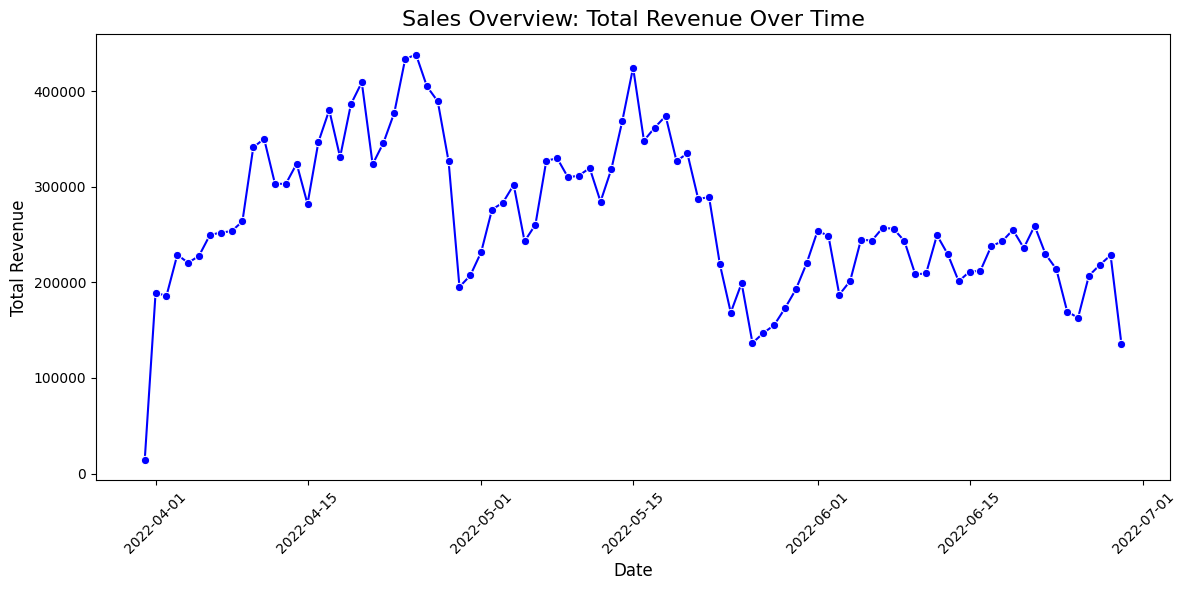

In [25]:
# Plotting the sales overview
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_overview, x='Date', y='Amount', marker='o', color='b')

# Adding title and labels
plt.title('Sales Overview: Total Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

# 2. Product Analysis

In [83]:
# 2. Product Analysis: Analyze revenue by product category
category_revenue = data.groupby('Category').agg({
    'Amount': 'sum'
}).reset_index()

In [84]:
# Sort by revenue in descending order
category_revenue = category_revenue.sort_values(by='Amount', ascending=False)

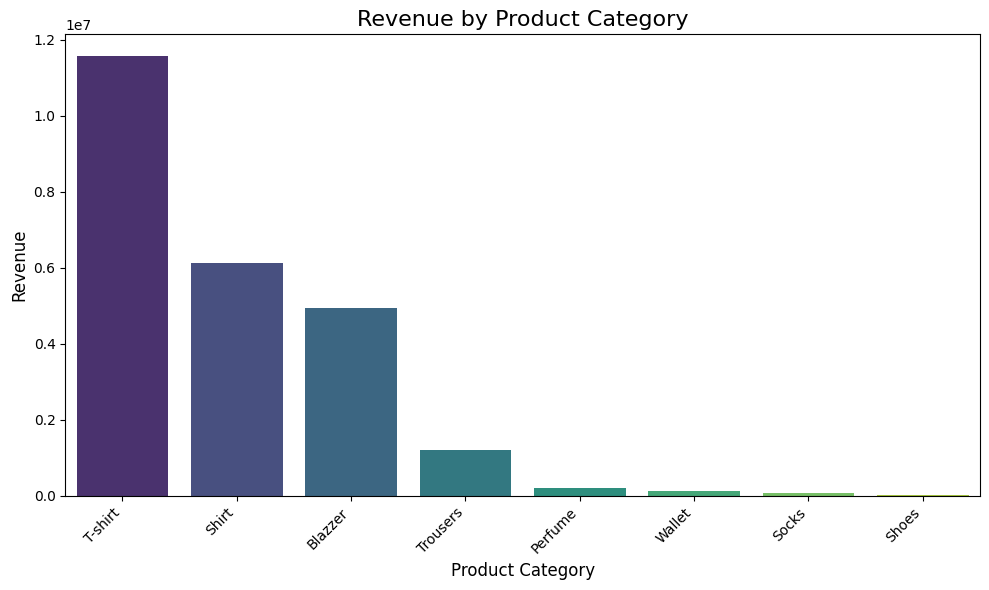

In [85]:
# Visualize top product categories by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Amount', data=category_revenue, hue='Category', palette='viridis')
plt.title('Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [41]:
# Drop rows with missing fulfillment or revenue
data = data.dropna(subset=['Fulfilment', 'Amount'])

# 3. Fulfillment Analysis

In [42]:
# 3. Fulfillment Analysis: Aggregate revenue by fulfillment method
fulfillment_stats = data.groupby('Fulfilment').agg({
    'Amount': 'sum'
}).reset_index()

In [44]:
# Drop rows with missing fulfillment or revenue
fulfillment_stats = fulfillment_stats.dropna(subset=['Fulfilment', 'Amount'])

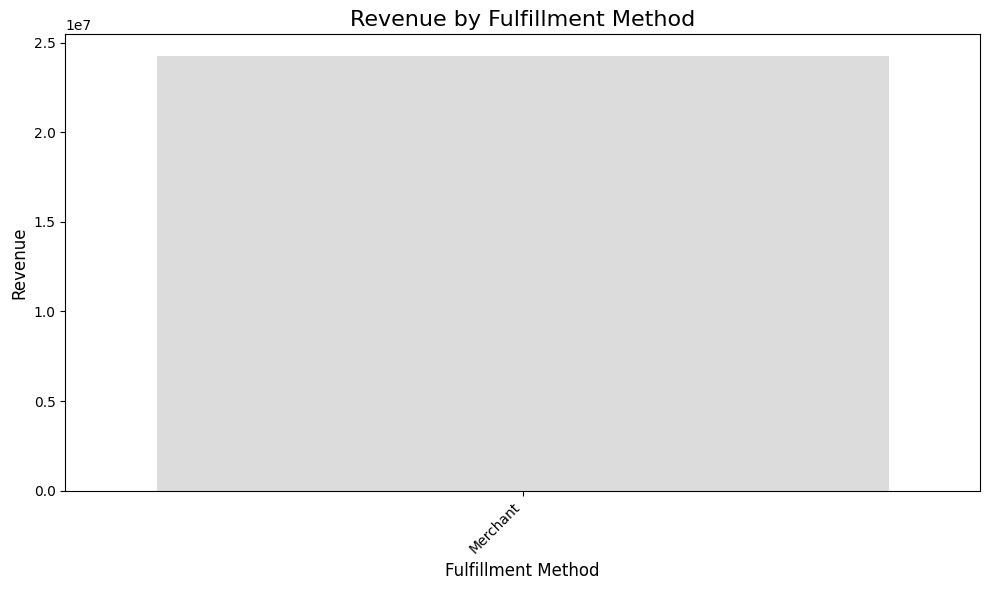

In [75]:
# Plot revenue by fulfillment method
plt.figure(figsize=(10, 6))
sns.barplot(x='Fulfilment', y='Amount', data=fulfillment_stats, hue='Fulfilment', palette='coolwarm')
plt.title('Revenue by Fulfillment Method', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Customer Analysis

In [47]:
# 4. Customer Analysis: Analyze orders and revenue by 'B2B' (business-to-business)
b2b_revenue = data.groupby('B2B').agg({
    '': 'sum',
    'Order ID': 'nunique'
}).reset_index()

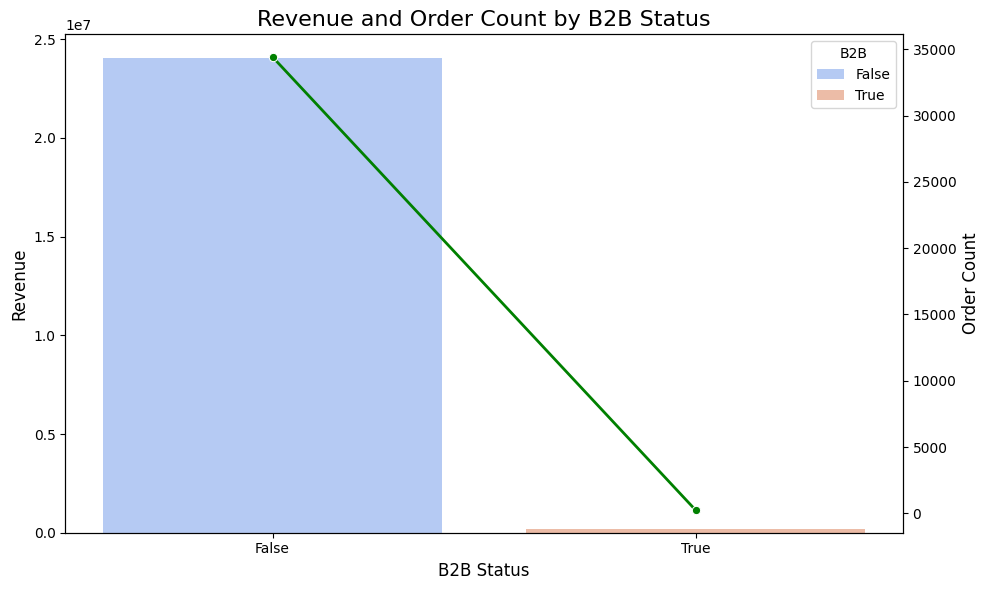

In [73]:
# Plot revenue and order count by B2B status
fig, ax1 = plt.subplots(figsize=(10, 6))
# Bar plot for revenue
sns.barplot(x='B2B', y='Amount', data=b2b_revenue, ax=ax1, hue='B2B', palette='coolwarm')
# Twin axis for order count
ax2 = ax1.twinx()
sns.lineplot(x='B2B', y='Order ID', data=b2b_revenue, ax=ax2, color='g', marker='o', linewidth=2)
# Title and labels
ax1.set_title('Revenue and Order Count by B2B Status', fontsize=16)
ax1.set_xlabel('B2B Status', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax2.set_ylabel('Order Count', fontsize=12)
plt.tight_layout()
plt.show()

# 5. Geographical Analysis

In [53]:
# 5. Geographical Analysis: Revenue by shipping state
state_revenue = data.groupby('ship-state').agg({
    'Amount': 'sum'
}).reset_index()

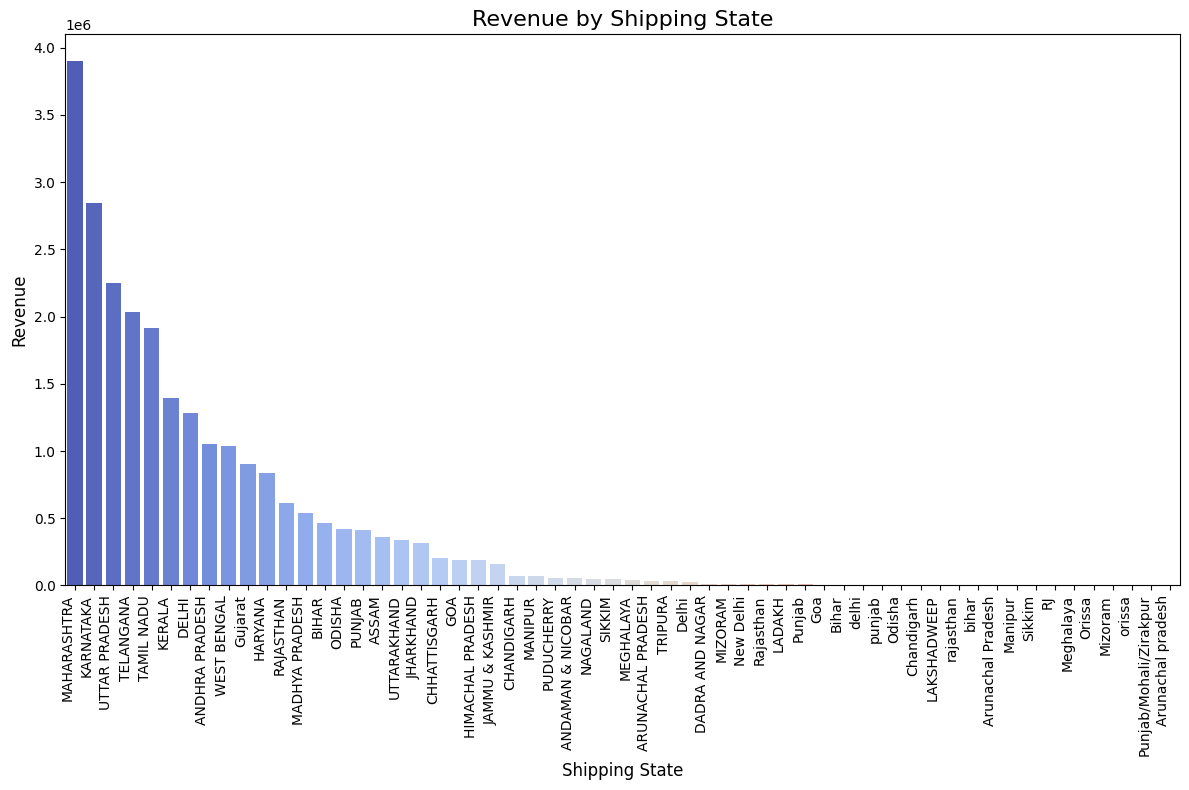

In [72]:
# Sort by revenue in descending order
state_revenue = state_revenue.sort_values(by='Amount', ascending=False)

# Plot revenue by state
plt.figure(figsize=(12, 8))
sns.barplot(x='ship-state', y='Amount', data=state_revenue, hue='ship-state', palette='coolwarm')
plt.title('Revenue by Shipping State', fontsize=16)  
plt.xlabel('Shipping State', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


# 6. Business Insights

In [57]:
# Fulfillment method performance
print("\nRevenue by Fulfillment Method:")
print(fulfillment_stats)


Revenue by Fulfillment Method:
  Fulfilment       Amount
0   Merchant  24254825.25


In [58]:
# B2B revenue and order counts
print("\nRevenue and Order Count by B2B Status:")
print(b2b_revenue)


Revenue and Order Count by B2B Status:
     B2B       Amount  Order ID
0  False  24047249.46     34418
1   True    207575.79       246


In [59]:
# State-level revenue
print("\nRevenue by State:")
print(state_revenue)


Revenue by State:
                ship-state      Amount
26             MAHARASHTRA  3904425.05
21               KARNATAKA  2843433.22
50           UTTAR PRADESH  2252247.08
48               TELANGANA  2033479.08
47              TAMIL NADU  1916318.30
22                  KERALA  1398141.58
12                   DELHI  1283282.97
1           ANDHRA PRADESH  1051875.86
52             WEST BENGAL  1035724.82
16                 Gujarat   901852.82
17                 HARYANA   837278.99
42               RAJASTHAN   612900.40
25          MADHYA PRADESH   541859.98
6                    BIHAR   464071.32
35                  ODISHA   418986.63
39                  PUNJAB   410846.89
3                    ASSAM   363059.20
51             UTTARAKHAND   336245.55
20               JHARKHAND   319008.21
9             CHHATTISGARH   203608.83
14                     GOA   187031.85
18        HIMACHAL PRADESH   186502.51
19         JAMMU & KASHMIR   159183.74
8               CHANDIGARH    71738.05
27    